In [212]:
"""
    @author: Ananth Sankar
    @date: 17 september 2025
    @title: Multiple Linear Regression
"""

'\n    @author: Ananth Sankar\n    @date: 17 september 2025\n    @title: Multiple Linear Regression\n'

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

In [214]:
"""
    Printing and analysing the general structure of the dataset
"""

dataset = pd.read_csv('cars.csv')


print(f"dataframe length: {len(dataset)}")
print(f"dataframe shape: {dataset.shape}")   
print(f"Empty values: {dataset.isnull().sum().sum()}")  
print(f"duplicate rows: {len(dataset[dataset.duplicated()])}")

dataframe length: 5076
dataframe shape: (5076, 18)
Empty values: 0
duplicate rows: 18


In [215]:
dataset.head()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


In [216]:
"""
      preprocessing
      encode catagorical values
      drop duplicates and null values
      dropping columns with no variability (single values) such as (engine info.hybrid)
      dropping unwanted columns (highway mpg)
"""
le = LabelEncoder()
dataset = dataset.drop_duplicates()
dataset = dataset.dropna()
dataset.drop(columns=['Engine Information.Hybrid', 'Fuel Information.Highway mpg'], axis=1, inplace=True)

for colname in dataset.columns:
      if dataset[colname].dtype in ('object', 'bool'):
            dataset[colname] = le.fit_transform(dataset[colname])

display(dataset.head())
display(dataset.info())
display(dataset.nunique())


,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,0,22,6,6,18,3,0,3,3,0,2009,250,236
1,140,143,202,2,13,6,6,22,3,0,1,3,0,2009,200,207
2,140,143,202,2,13,6,7,21,3,1,0,3,0,2009,200,207
3,140,143,202,0,13,6,6,21,3,0,2,3,0,2009,200,207
5,91,17,62,0,23,6,7,16,3,1,7,3,2,2009,265,243


<class 'pandas.core.frame.DataFrame'>
Index: 5058 entries, 0 to 5075
Data columns (total 16 columns):
 #   Column                                           Non-Null Count  Dtype
---  ------                                           --------------  -----
 0   Dimensions.Height                                5058 non-null   int64
 1   Dimensions.Length                                5058 non-null   int64
 2   Dimensions.Width                                 5058 non-null   int64
 3   Engine Information.Driveline                     5058 non-null   int32
 4   Engine Information.Engine Type                   5058 non-null   int32
 5   Engine Information.Number of Forward Gears       5058 non-null   int64
 6   Engine Information.Transmission                  5058 non-null   int32
 7   Fuel Information.City mpg                        5058 non-null   int64
 8   Fuel Information.Fuel Type                       5058 non-null   int32
 9   Identification.Classification                    5058 non

None

Dimensions.Height                                   198
Dimensions.Length                                   208
Dimensions.Width                                    138
Engine Information.Driveline                          4
Engine Information.Engine Type                      535
Engine Information.Number of Forward Gears            5
Engine Information.Transmission                      11
Fuel Information.City mpg                            27
Fuel Information.Fuel Type                            4
Identification.Classification                         2
Identification.ID                                  5030
Identification.Make                                  47
Identification.Model Year                           918
Identification.Year                                   4
Engine Information.Engine Statistics.Horsepower     216
Engine Information.Engine Statistics.Torque         217
dtype: int64

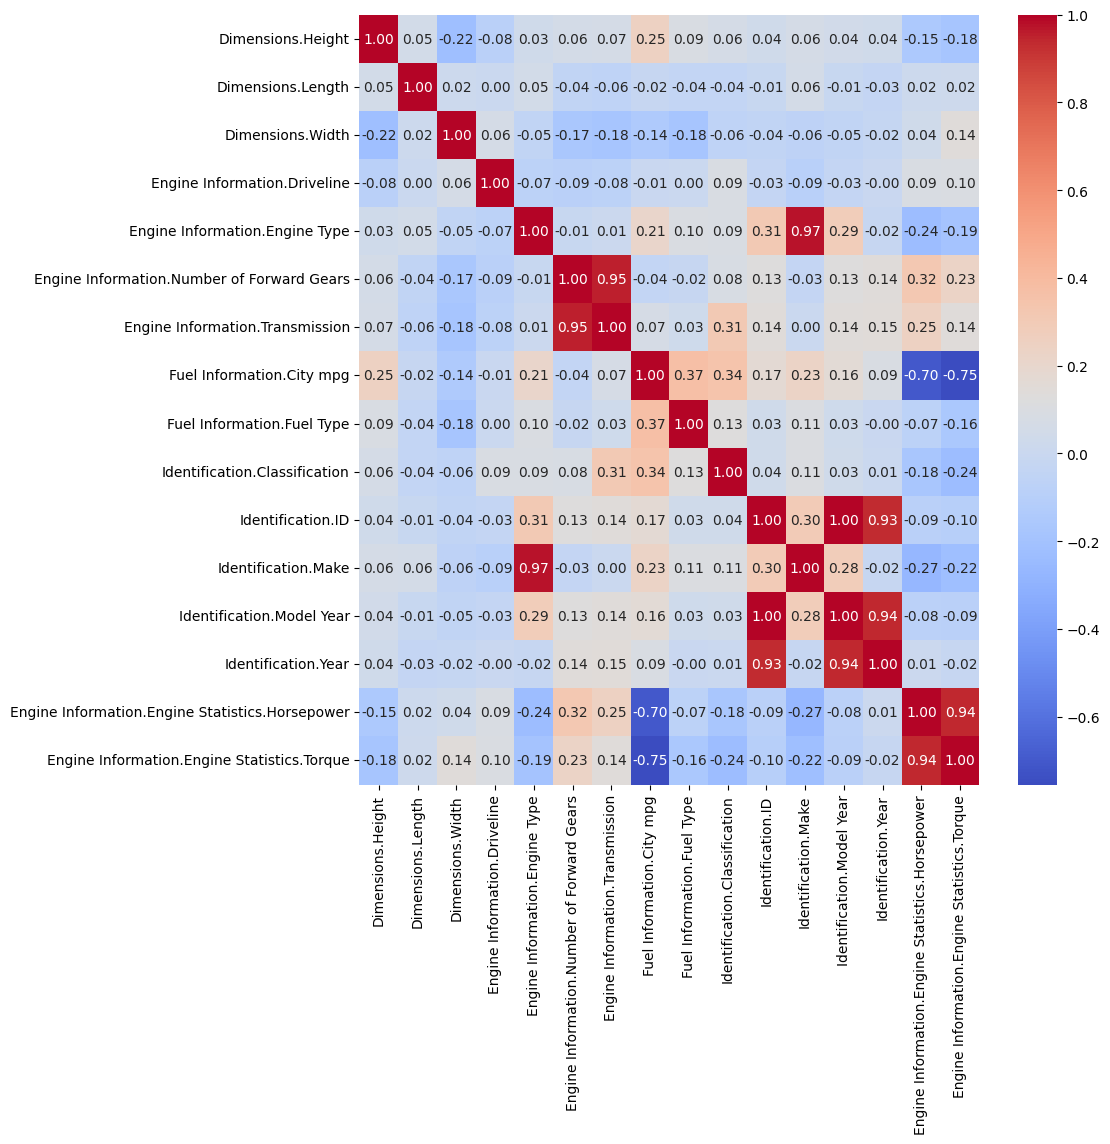

Fuel Information.City mpg                          1.000000
Engine Information.Engine Statistics.Torque        0.754837
Engine Information.Engine Statistics.Horsepower    0.701597
Fuel Information.Fuel Type                         0.370479
Identification.Classification                      0.344185
Dimensions.Height                                  0.249637
Identification.Make                                0.225899
Engine Information.Engine Type                     0.207403
Identification.ID                                  0.169686
Identification.Model Year                          0.161614
Dimensions.Width                                   0.140245
Identification.Year                                0.091522
Engine Information.Transmission                    0.069831
Engine Information.Number of Forward Gears         0.036855
Dimensions.Length                                  0.017899
Engine Information.Driveline                       0.006249
Name: Fuel Information.City mpg, dtype: 

In [217]:
"""
    plot correlation map
    mpg vs features
"""
corr_matrix = dataset.corr()
corr_target = corr_matrix['Fuel Information.City mpg']
best_features = corr_target.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

best_features

In [218]:
"""
    selecting best 6 features excluding the target column itself
"""
df = dataset[best_features.index.tolist()[: 7]]

display(df.head())
display(df.describe())

,Fuel Information.City mpg,Engine Information.Engine Statistics.Torque,Engine Information.Engine Statistics.Horsepower,Fuel Information.Fuel Type,Identification.Classification,Dimensions.Height,Identification.Make
0,18,236,250,3,0,140,3
1,22,207,200,3,0,140,3
2,21,207,200,3,1,140,3
3,21,207,200,3,0,140,3
5,16,243,265,3,1,91,3


,Fuel Information.City mpg,Engine Information.Engine Statistics.Torque,Engine Information.Engine Statistics.Horsepower,Fuel Information.Fuel Type,Identification.Classification,Dimensions.Height,Identification.Make
count,5058.000000,5058.000000,5058.000000,5058.000000,5058.000000,5058.000000,5058.000000
mean,17.275405,272.682483,270.559312,2.898379,0.222025,145.679518,21.036180
std,4.483648,100.146014,95.332497,0.322441,0.415649,62.195040,13.235223
min,8.000000,98.000000,100.000000,0.000000,0.000000,1.000000,0.000000
25%,14.000000,187.000000,190.000000,3.000000,0.000000,104.000000,9.000000
50%,17.000000,260.000000,266.000000,3.000000,0.000000,152.000000,15.000000
75%,20.000000,335.000000,317.000000,3.000000,0.000000,193.000000,32.000000
max,38.000000,774.000000,638.000000,3.000000,1.000000,255.000000,46.000000


In [219]:
"""
    dynamically remove all outliers from every column
    threshold of zscore is set as 3
"""
df_no_outliers = df.copy()

for col in df_no_outliers.columns:
    df_no_outliers[f"z_score_{col}"] = zscore(df[col])
    df_no_outliers = df_no_outliers[df_no_outliers[f"z_score_{col}"].abs() <= 3]
    
    df_no_outliers = df_no_outliers.drop(columns=[f"z_score_{col}"])
    
    

print(len(df), len(df_no_outliers))

5058 4977


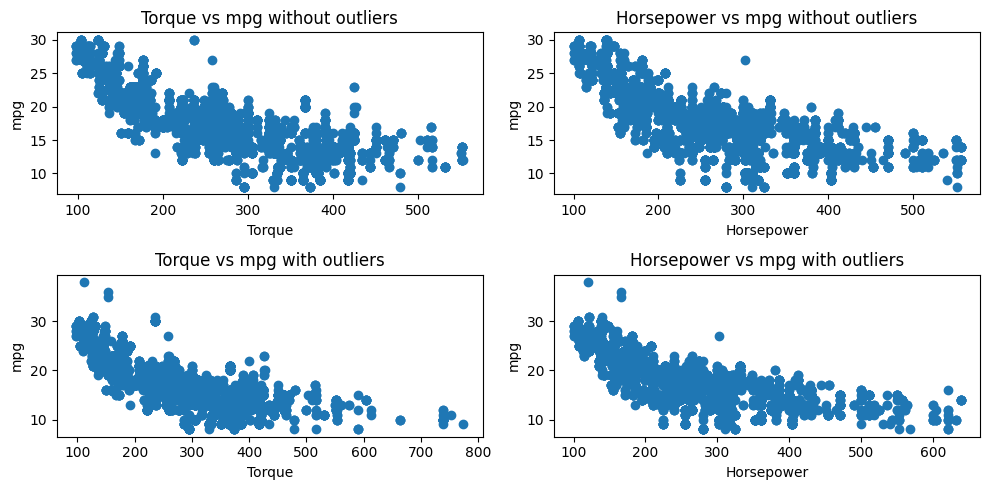

In [220]:
"""
    plotting few of the columns to show how outliers affected the overall distribution
"""

fig, ax = plt.subplots(2, 2, figsize=(10, 5))

ax[0][0].set_title("Torque vs mpg without outliers")
ax[0][0].scatter(df_no_outliers['Engine Information.Engine Statistics.Torque'], df_no_outliers['Fuel Information.City mpg'])
ax[0][0].set_xlabel('Torque')
ax[0][0].set_ylabel('mpg')

ax[0][1].set_title('Horsepower vs mpg without outliers')
ax[0][1].scatter(df_no_outliers['Engine Information.Engine Statistics.Horsepower'], df_no_outliers['Fuel Information.City mpg'])
ax[0][1].set_xlabel('Horsepower')
ax[0][1].set_ylabel('mpg')

ax[1][0].set_title('Torque vs mpg with outliers')
ax[1][0].scatter(df['Engine Information.Engine Statistics.Torque'], df['Fuel Information.City mpg'])
ax[1][0].set_xlabel('Torque')
ax[1][0].set_ylabel('mpg')

ax[1][1].set_title('Horsepower vs mpg with outliers')
ax[1][1].scatter(df['Engine Information.Engine Statistics.Horsepower'], df['Fuel Information.City mpg'])
ax[1][1].set_xlabel('Horsepower')
ax[1][1].set_ylabel('mpg')
plt.tight_layout()
plt.show()

In [221]:
"""
    scale both target and feature columns (mean = 0, variance = 1)
"""

yy = df_no_outliers['Fuel Information.City mpg']
XX = df_no_outliers.drop(columns=['Fuel Information.City mpg'], axis=1)

y_scaler = StandardScaler()
x_scaler = StandardScaler()

y = pd.DataFrame(y_scaler.fit_transform(yy.values.reshape(-1, 1)), columns=['Fuel Information.City mpg'])
X = pd.DataFrame(x_scaler.fit_transform(XX), columns=XX.columns)

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {xtrain.shape}")
print(f"X_test shape: {xtest.shape}")
print(f"y_train shape: {ytrain.shape}")
print(f"y_test shape: {ytest.shape}")



X_train shape: (3981, 6)
X_test shape: (996, 6)
y_train shape: (3981, 1)
y_test shape: (996, 1)


In [222]:
"""
    VIF scores
"""
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data


,feature,VIF
0,Engine Information.Engine Statistics.Torque,10.041167
1,Engine Information.Engine Statistics.Horsepower,9.774862
2,Fuel Information.Fuel Type,1.084806
3,Identification.Classification,1.110518
4,Dimensions.Height,1.043743
5,Identification.Make,1.113143


In [223]:
"""
    fit model and conduct performance metrics
"""

model = LinearRegression()

model.fit(xtrain, ytrain)

print("Coefficients (weights):", model.coef_)
print("Intercept (bias):", model.intercept_)

predictions = model.predict(xtrain)

print(f"training R2 score: {r2_score(ytrain, predictions)}")
print(f"training mean squared error: {mean_squared_error(ytrain, predictions)}")
print(f"training rmse: {np.sqrt(mean_squared_error(ytrain, predictions))}")

Coefficients (weights): [[-0.68403756  0.01328393  0.32960194  0.11411713  0.08349157  0.0040481 ]]
Intercept (bias): [0.00154598]
training R2 score: 0.7335916189281075
training mean squared error: 0.26846994797556684
training rmse: 0.5181408572729687


In [224]:
"""
    perform metrics analysis on validation dataset using the model that has been trained
"""

def predict(x, model, inverse_transform=False):
    if (len(x.shape) < 2):
        x = x.reshape(1, -1)
    prediction = model.predict(x)
    
    if inverse_transform:
        prediction = y_scaler.inverse_transform(prediction)
    
    return prediction

predictions = predict(xtest, model)

print(f"validation set R2 score: {r2_score(ytest, predictions)}")
print(f"validation set mean squared error: {mean_squared_error(ytest, predictions)}")
print(f"validation set rmse: {np.sqrt(mean_squared_error(ytest, predictions))}")

validation set R2 score: 0.7375796942098578
validation set mean squared error: 0.25426194759550647
validation set rmse: 0.5042439365976615
